In [20]:
import pandas as pd
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
import time
import seaborn as sns
sns.set(style='whitegrid',palette='husl')
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [57]:
df=pd.read_csv('tabula-psychiatry_residency.csv',thousands=',')

In [58]:
df.columns = df.columns.str.replace("ERAS", "")

In [59]:
df.columns=df.columns.str.replace(r"\.1", "_applications_per_program")

In [60]:
df=df.rename(columns={'Unnamed: 0':'race'})

In [61]:
df.columns=df.columns.str.replace(" ",'')

In [62]:
df[df.columns[1:]]=df[df.columns[1:]].apply(pd.to_numeric)

In [64]:
#make a total row
df.loc['Total',:]= df.sum(axis=0)

In [85]:
df['pct_14']=df['2014']/(df['2014']['Total'])*100

In [75]:
df['pct_15']=df['2015']/(df['2015']['Total'])*100
df['pct_16']=df['2016']/(df['2016']['Total'])*100
df['pct_17']=df['2017']/(df['2017']['Total'])*100
df['pct_18']=df['2018']/(df['2018']['Total'])*100

In [78]:
df['race']['Total']='Total'

/Users/lilyliu-krason/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
df[['race','pct_14','pct_15','pct_16','pct_17','pct_18']][:-1]

,race,pct_14,pct_15,pct_16,pct_17,pct_18
0,American Indian or Alaska Native,0.467687,0.678253,0.606061,0.674060,0.626263
1,Asian,36.670918,36.116999,34.025974,34.181344,33.131313
2,Black or African American,11.883503,11.403137,10.476190,11.415525,11.212121
3,"Hispanic, Latino, or of Spanish\rOrigin",6.653912,7.248834,8.484848,8.066971,8.828283
4,Native Hawaiian or Other Pacific\rIslander,0.106293,0.084782,0.064935,0.152207,0.202020
5,White,31.122449,33.234421,33.614719,34.485758,35.393939
6,Other Race/Ethnicity,4.761905,5.150487,4.675325,3.718200,4.383838
7,Unknown Race/Ethnicity,8.333333,6.083086,8.051948,7.305936,6.222222


In [102]:
sns.set(font_scale=3) 

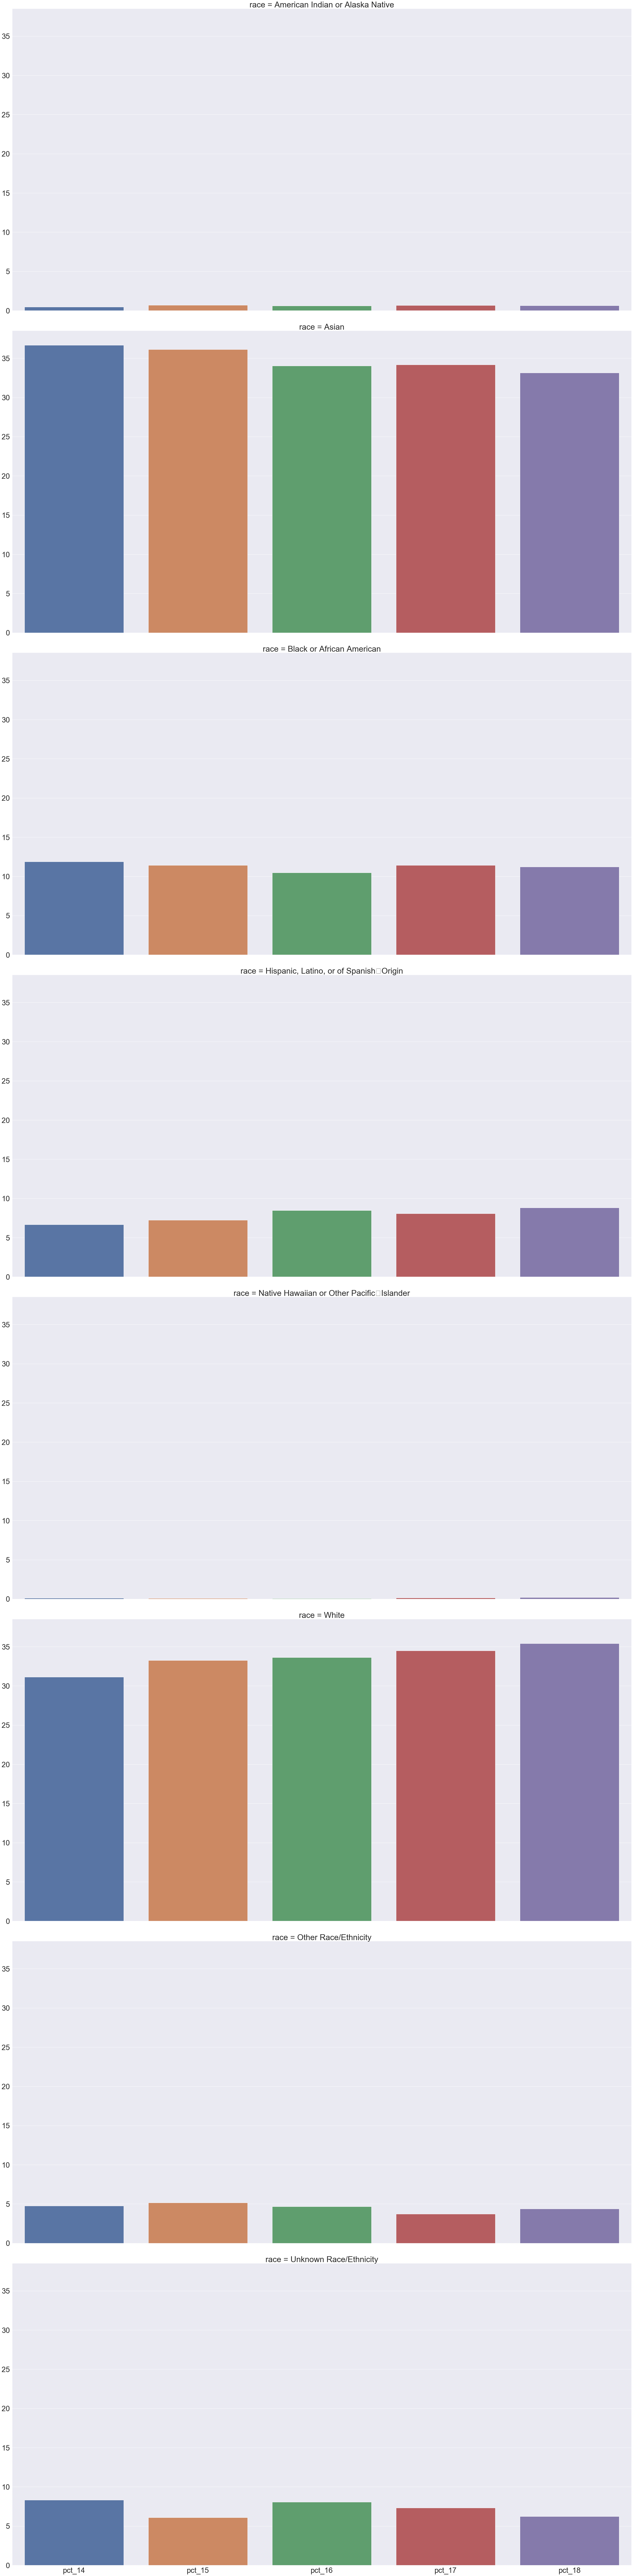

In [103]:
sns.catplot(kind='bar',row='race',data=df[['race','pct_14','pct_15','pct_16','pct_17','pct_18']][:-1],height=20,aspect=2)

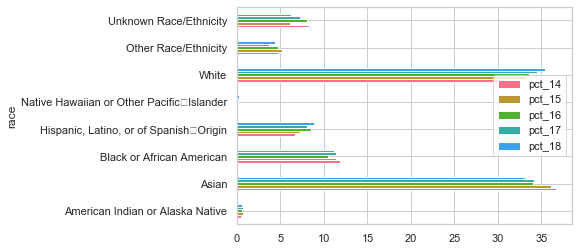

In [98]:
df[['race','pct_14','pct_15','pct_16','pct_17','pct_18']][:-1].plot(kind='barh',x='race')

In [110]:
df[['race','pct_14','pct_15','pct_16','pct_17','pct_18']][:-1].reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
index     8 non-null int64
race      8 non-null object
pct_14    8 non-null float64
pct_15    8 non-null float64
pct_16    8 non-null float64
pct_17    8 non-null float64
pct_18    8 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 528.0+ bytes


# Look at Overall Medical School Graduates


In [116]:
df_2014=pd.read_csv('2014_med_grads.csv')

In [147]:
for column in df_2014.columns[1:-3]:
    df_2014[f'{column}_pct'] = df[column]/18078

KeyError: 'White'